# Course: Application of AI, Data Science and Machine Learning
# Lab 7: Generative Adversarial Learning

## Q1. Generate GAN model for function f(x) =X^2. Using the information in lecture 14, 15 or on the following blog
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

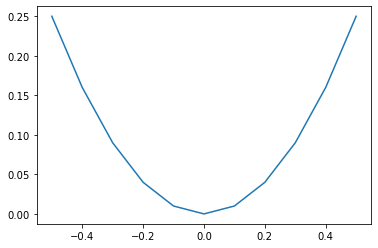

In [ ]:
# demonstrate simple x^2 function
from matplotlib import pyplot
 
# simple function
def calculate(x):
	return x * x
 
# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

[-0.26046434 -0.29436842 -0.23916462 -0.31245849 -0.2611964   0.16858603
 -0.23087149 -0.0731779   0.35244384 -0.21704145  0.25282387 -0.15814517
 -0.24533261 -0.00920799  0.31461322  0.45624522 -0.34911492  0.35496599
  0.45260428 -0.23742964  0.03894327  0.38726447  0.44983455  0.40985088
 -0.03228299  0.27497713 -0.16464354  0.33118451  0.22272858  0.12260541
  0.450463   -0.09415688 -0.34210386  0.09788924  0.18520475  0.26070397
  0.31403263  0.02568668 -0.34147193 -0.00111843 -0.41998202 -0.42284744
  0.42556811  0.43032342  0.18963874  0.29011721 -0.17675201 -0.07043533
  0.07069136 -0.49584879  0.39175751  0.15609117 -0.398924    0.19828022
  0.10782773 -0.13296742 -0.41566403  0.47733804  0.05497232  0.15888652
  0.44875492  0.10982752 -0.1254002  -0.27234536  0.47113715 -0.49256201
 -0.1042518  -0.29297571 -0.37163642  0.33006889 -0.00221908 -0.4406268
  0.34420432 -0.04236455 -0.11668288 -0.13556888  0.43764178  0.10378259
 -0.40891277 -0.36493398 -0.01891133 -0.29010851 -0.

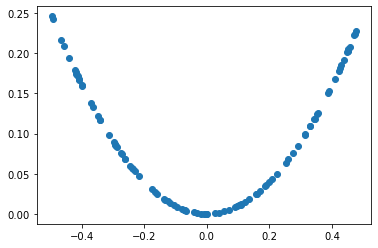

In [ ]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
 
# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	print(X1)
	print('------------')

	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	print(X2)
	print('------------')

	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	print('------------')
	print(X1)
	print(X2)
	return hstack((X1, X2))
 
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [ ]:
# define the discriminator model
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                75        
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
pip install graphviz

     |████████████████████████████████| 46 kB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y
 
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y
 
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)
 
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.75 0.546875
1 0.78125 0.453125
2 0.734375 0.578125
3 0.671875 0.453125
4 0.65625 0.5
5 0.6875 0.609375
6 0.671875 0.71875
7 0.65625 0.640625
8 0.453125 0.5625
9 0.453125 0.625
10 0.640625 0.59375
11 0.59375 0.578125
12 0.484375 0.65625
13 0.609375 0.703125
14 0.515625 0.65625
15 0.5625 0.59375
16 0.546875 0.640625
17 0.484375 0.703125
18 0.5625 0.59375
19 0.46875 0.578125
20 0.46875 0.75
21 0.421875 0.578125
22 0.4375 0.609375
23 0.5 0.671875
24 0.4375 0.796875
25 0.3125 0.671875
26 0.46875 0.65625
27 0.34375 0.765625
28 0.390625 0.65625
29 0.375 0.734375
30 0.46875 0.625
31 0.484375 0.71875
32 0.25 0.625
33 0.265625 0.625
34 0.28125 0.59375
35 0.3125 0.703125
36 0.25 0.703125
37 0.28125 0.71875
38 0.203125 0.75
39 0.234375 0.765625
40 0.25 0.734375
41 0.171875 0.734375
42 0.28125 0.765625
43 0.125 0.609375
44 0.25 0.78125
45 0.15625 0.671875
46 0.203125 0.703125
47 0.09375 0.8125
48 0.046875 0.890625
49 0.078125 0.875
50 0.046875 0.890625
51 0.09375 0.84375
52 0.0625 0.953125
53 0

424 0.984375 0.90625
425 0.984375 0.921875
426 0.9375 0.90625
427 1.0 0.90625
428 0.9375 0.90625
429 0.984375 0.953125
430 0.984375 0.84375
431 0.984375 0.84375
432 0.953125 0.890625
433 0.9375 0.890625
434 0.96875 0.84375
435 0.953125 0.875
436 0.984375 0.921875
437 0.984375 0.90625
438 0.921875 0.828125
439 0.9375 0.890625
440 0.9375 0.890625
441 0.953125 0.953125
442 1.0 0.9375
443 0.96875 0.921875
444 0.984375 0.875
445 0.953125 0.9375
446 0.9375 0.90625
447 0.984375 0.90625
448 0.984375 0.890625
449 0.984375 0.921875
450 0.953125 0.875
451 0.96875 0.890625
452 0.953125 0.90625
453 0.953125 0.921875
454 0.984375 0.921875
455 0.984375 0.921875
456 0.96875 0.890625
457 0.96875 0.90625
458 0.953125 0.84375
459 0.96875 0.921875
460 0.953125 0.9375
461 0.96875 0.921875
462 0.96875 0.953125
463 0.96875 0.84375
464 1.0 0.890625
465 0.953125 0.890625
466 0.9375 0.859375
467 0.953125 0.875
468 0.984375 0.859375
469 0.921875 0.953125
470 0.984375 0.828125
471 0.984375 0.90625
472 0.953125 0.

913 1.0 0.859375
914 1.0 0.828125
915 1.0 0.875
916 1.0 0.859375
917 1.0 0.890625
918 1.0 0.875
919 1.0 0.828125
920 1.0 0.890625
921 1.0 0.890625
922 1.0 0.765625
923 1.0 0.890625
924 1.0 0.875
925 1.0 0.890625
926 1.0 0.890625
927 1.0 0.953125
928 1.0 0.8125
929 1.0 0.8125
930 1.0 0.828125
931 1.0 0.921875
932 1.0 0.890625
933 1.0 0.765625
934 1.0 0.875
935 1.0 0.8125
936 1.0 0.9375
937 1.0 0.875
938 1.0 0.859375
939 1.0 0.84375
940 1.0 0.859375
941 1.0 0.828125
942 1.0 0.890625
943 1.0 0.890625
944 1.0 0.875
945 1.0 0.875
946 1.0 0.875
947 1.0 0.890625
948 1.0 0.875
949 1.0 0.890625
950 1.0 0.890625
951 1.0 0.875
952 1.0 0.953125
953 1.0 0.890625
954 1.0 0.859375
955 1.0 0.875
956 1.0 0.90625
957 1.0 0.828125
958 1.0 0.875
959 1.0 0.84375
960 1.0 0.828125
961 1.0 0.9375
962 1.0 0.796875
963 1.0 0.921875
964 1.0 0.921875
965 1.0 0.859375
966 1.0 0.890625
967 1.0 0.890625
968 1.0 0.90625
969 1.0 0.890625
970 1.0 0.90625
971 1.0 0.890625
972 1.0 0.953125
973 1.0 0.828125
974 1.0 0.9062

In [ ]:
# demonstrate creating the three models in the gan
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 2)                 122       
                                                                 
 sequential_3 (Sequential)   (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


**Solution from the lecturor**

In [ ]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % 200 == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

# Credit:
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

# More
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/